In [2]:
import glob
import pandas as pd

path ='/Users/ryanpurcell/Desktop/LendingClub Combined Data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,usecols=[*range(0,50)], encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
    list_.append(df)
df= pd.concat(list_)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466352 entries, 0 to 42537
Data columns (total 50 columns):
id                            7 non-null object
member_id                     0 non-null float64
loan_amnt                     466345 non-null float64
funded_amnt                   466345 non-null float64
funded_amnt_inv               466345 non-null float64
term                          466345 non-null object
int_rate                      466345 non-null object
installment                   466345 non-null float64
grade                         466345 non-null object
sub_grade                     466345 non-null object
emp_title                     438746 non-null object
emp_length                    445327 non-null object
home_ownership                466345 non-null object
annual_inc                    466341 non-null float64
verification_status           466345 non-null object
issue_d                       466345 non-null object
loan_status                   466345 non-null 

In [3]:
#gradefilter=df['grade']=='B'
#df=df[gradefilter]

In [4]:
#filter1=df['addr_state']=='NE'
#df1=df[filter1]
#df2=df1.groupby('grade')['grade'].count()
#df3=df1.groupby('grade')['grade'].count()/df2.sum()
#df1['addr_state']
#df3

In [5]:
#df filter for 36 month term
#df['term']=df['term'].astype('str')
#termfilter= df['term'].str.contains('36')
#df1=df.loc[termfilter]
#df2=df1.groupby('grade')['grade'].count()
#df3=df1.groupby('grade')['grade'].count()/df2.sum()
#df3

In [6]:
from datetime import datetime, timedelta

#df['A'] = pd.to_datetime(df['last_pymnt_d'])
#df['A'].dtypes

In [7]:
#df['B'] = pd.to_datetime(df['issue_d'])
#df['B'].dtypes

In [8]:
#df['Difference'] = df['A'] - df['B']

In [9]:
#datefilter=df['Difference']<timedelta(days=180)

In [10]:
df['addr_state'].value_counts(normalize=True)

CA    0.153234
NY    0.086299
TX    0.078140
FL    0.067853
IL    0.039913
NJ    0.038733
PA    0.035219
OH    0.032675
GA    0.032116
VA    0.030501
NC    0.027203
MI    0.024767
MA    0.023744
MD    0.023536
AZ    0.022970
WA    0.022554
CO    0.020884
MN    0.017493
MO    0.016102
CT    0.015450
IN    0.013996
NV    0.013983
TN    0.012834
OR    0.012759
WI    0.012677
AL    0.012559
SC    0.011974
LA    0.011772
KY    0.009517
KS    0.008987
OK    0.008830
AR    0.007479
UT    0.007353
NM    0.005554
HI    0.005333
WV    0.005172
NH    0.004786
RI    0.004398
DC    0.003060
MT    0.002996
DE    0.002728
AK    0.002683
MS    0.002629
WY    0.002419
SD    0.002101
VT    0.001941
IA    0.000030
NE    0.000030
ID    0.000026
ME    0.000009
Name: addr_state, dtype: float64

In [23]:
a7=df.pivot_table(index='addr_state',values='funded_amnt',aggfunc=sum)
a7=a7.sort_values('funded_amnt',ascending=False)
a7['funded_percent']=(a7['funded_amnt']/sum(a7['funded_amnt'])).round(3)*100
#a7['combined']=a7['addr_state'].astype(str)+" "+a7['funded_percent'].astype(str)
a7

,funded_amnt,funded_percent
addr_state,,
CA,1.004826e+09,15.1
NY,5.670095e+08,8.5
TX,5.504479e+08,8.3
FL,4.248525e+08,6.4
IL,2.742508e+08,4.1
NJ,2.700700e+08,4.1
PA,2.288041e+08,3.4
GA,2.168429e+08,3.3
VA,2.159662e+08,3.2


In [ ]:
c7['funded_amnt']

In [20]:
a7=df.pivot_table(index='addr_state',values='funded_amnt',aggfunc=sum)
a7=a7.sort_values('funded_amnt',ascending=False)
a7['funded_percent']=(a7['funded_amnt']/sum(a7['funded_amnt'])).round(3)*100
c7=a7.reset_index()
c7=c7.head(-4)
d7=c7['addr_state']
b7=c7['funded_amnt']
print(list(d7))
print(list(b7))

['CA', 'NY', 'TX', 'FL', 'IL', 'NJ', 'PA', 'GA', 'VA', 'OH', 'NC', 'MA', 'MD', 'MI', 'WA', 'AZ', 'CO', 'MN', 'MO', 'CT', 'IN', 'TN', 'NV', 'AL', 'WI', 'SC', 'OR', 'LA', 'KY', 'KS', 'OK', 'UT', 'AR', 'NM', 'HI', 'WV', 'NH', 'RI', 'DC', 'AK', 'MT', 'MS', 'DE', 'WY', 'SD', 'VT']
[1004825725.0, 567009500.0, 550447875.0, 424852500.0, 274250750.0, 270070025.0, 228804075.0, 216842925.0, 215966250.0, 211299250.0, 179204700.0, 170685100.0, 164775575.0, 160168275.0, 150923075.0, 147505500.0, 141430300.0, 112492325.0, 104552900.0, 103398250.0, 96173975.0, 88804675.0, 88262225.0, 83955725.0, 82640550.0, 80793300.0, 79323775.0, 78842450.0, 62197050.0, 59798650.0, 59082150.0, 49018325.0, 47460225.0, 37991775.0, 36677650.0, 34342325.0, 32289325.0, 27784550.0, 20780450.0, 20596575.0, 18818250.0, 18614650.0, 18281975.0, 17183000.0, 13068425.0, 12184000.0]


In [44]:
c7['funded_percent']=c7['funded_amnt']/sum(c7['funded_amnt'])
c7['funded_percent']=(c7['funded_percent']).round(3)*100
c7['combined']=c7['addr_state'].astype(str)+" "+ c7['funded_percent'].astype(str)+"%"
c7['combined']
c7
print(list(c7['combined']))

names = c7['combined'].head(-10)


['CA 15.1%', 'NY 8.5%', 'TX 8.3%', 'FL 6.4%', 'IL 4.1%', 'NJ 4.1%', 'PA 3.4%', 'GA 3.3%', 'VA 3.2%', 'OH 3.2%', 'NC 2.7%', 'MA 2.6%', 'MD 2.5%', 'MI 2.4%', 'WA 2.3%', 'AZ 2.2%', 'CO 2.1%', 'MN 1.7%', 'MO 1.6%', 'CT 1.6%', 'IN 1.4%', 'TN 1.3%', 'NV 1.3%', 'AL 1.3%', 'WI 1.2%', 'SC 1.2%', 'OR 1.2%', 'LA 1.2%', 'KY 0.9%', 'KS 0.9%', 'OK 0.9%', 'UT 0.7%', 'AR 0.7%', 'NM 0.6%', 'HI 0.6%', 'WV 0.5%', 'NH 0.5%', 'RI 0.4%', 'DC 0.3%', 'AK 0.3%', 'MT 0.3%', 'MS 0.3%', 'DE 0.3%', 'WY 0.3%', 'SD 0.2%', 'VT 0.2%']


In [45]:
c7

,addr_state,funded_amnt,funded_percent,combined
0,CA,1.004826e+09,15.1,CA 15.1%
1,NY,5.670095e+08,8.5,NY 8.5%
2,TX,5.504479e+08,8.3,TX 8.3%
3,FL,4.248525e+08,6.4,FL 6.4%
4,IL,2.742508e+08,4.1,IL 4.1%
5,NJ,2.700700e+08,4.1,NJ 4.1%
6,PA,2.288041e+08,3.4,PA 3.4%
7,GA,2.168429e+08,3.3,GA 3.3%
8,VA,2.159662e+08,3.2,VA 3.2%
9,OH,2.112992e+08,3.2,OH 3.2%


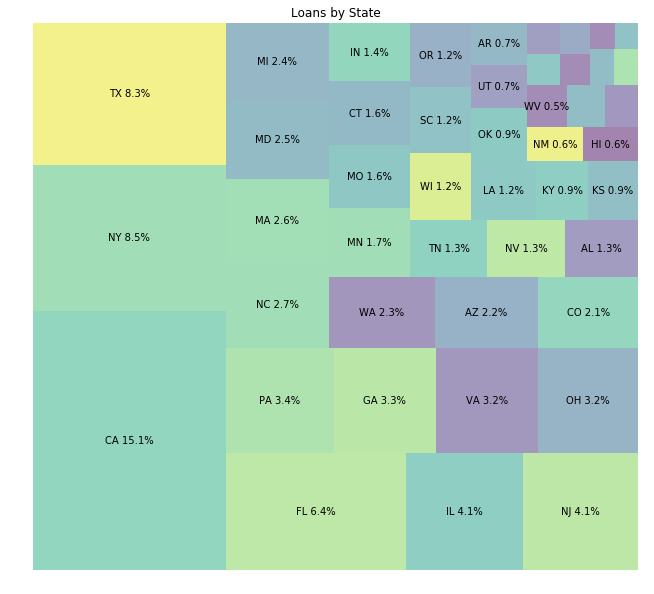

In [46]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# If you have 2 lists
squarify.plot(sizes=list(b7), label=names, alpha=.5)
plt.subplots_adjust(top=2, bottom=.1, left=.1, right=1.5, hspace=2,
                    wspace=1)

plt.axis('off')
plt.title('Loans by State')
plt.show()


In [ ]:
#Charge Off Probability
Total=df.groupby(['addr_state'])['funded_amnt'].count()
df1=df[(df.loan_status=='Charged Off')]
df2=df1.groupby(['addr_state'])['funded_amnt'].count()
df3=(df2/Total).round(2).dropna()
df4=df3.reset_index()
df4=df4.sort_values(by=['funded_amnt'],ascending = False)
purpose = df4['addr_state']
CO=df4['funded_amnt']
df4
#find out how to name the columns
#sort by default

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = purpose
y_pos = np.arange(len(people))
performance = CO
error = np.random.rand(len(people))

ax.barh(y_pos, performance, color = 'green', )#xerr=error, align='center')
        #color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Default Rate')
#ax.set_title('Default Rate by State')
ax.set_xlim(0,.40)
plt.subplots_adjust(top=2, bottom=.1, left=.1, right=1.5, hspace=2,
                    wspace=.5)

plt.title('Default Rate by State')
plt.show()

In [ ]:
df['performance']=(df['total_pymnt']-df['collection_recovery_fee']) / (df['funded_amnt']) - 1

In [ ]:
df['addr_state'].fillna(0, inplace=True)
searchfor = ['IA','ID','DC','NH','WV','VT','KS','WY','CO','SC','MT','OR','CT','GA','IL','AK','TX','WA','WI']
statefilter = df['addr_state'].str.contains('|'.join(searchfor),na=False)
df1=df[statefilter]

In [ ]:
filter1 = df.addr_state =='NE'
df[filter1].iloc[:, 30:50]
